In [77]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
import plotly.graph_objects as go

# load from github
train_data = pd.read_csv('https://raw.githubusercontent.com/cxxclk/ECOM90025/main/Data/train_data.csv')
print(train_data.head())

# set device to browser
import plotly.io as pio
pio.renderers.default = "vscode"

   ID         Y        X1        X2        X3        X4        X5        X6  \
0   0 -1.399091  1.174139  1.413109  0.164693 -1.067338  0.015324 -1.280970   
1   1  3.097990  0.208922  0.931231  0.838779  0.893483 -0.510555  0.900289   
2   2 -1.707346 -0.744982  0.962118  0.615392 -0.427943 -0.014912  1.138781   
3   3  0.610625 -0.170428 -1.361771  0.206042  0.623124  0.907441 -0.873814   
4   4 -0.689196 -0.858792  0.321308 -0.415649  1.014056 -0.522858  0.926634   

         X7        X8  ...       X41       X42       X43       X44       X45  \
0  0.489681 -0.371982  ... -0.115044 -2.580043 -0.812428  0.772820 -0.460444   
1 -0.042490  0.839400  ...  1.155635  0.673035 -0.438152 -0.001316 -0.761800   
2  1.159491  0.055467  ...  0.299277  1.387495 -0.007519 -0.464825  0.830986   
3  1.287383  0.901191  ...  1.209247  0.095866 -0.287905 -1.110714 -1.660352   
4 -0.390663  0.790054  ... -1.191989 -1.127448  0.246358  0.407769  1.132454   

        X46       X47       X48       X49   

In [78]:
# load from github
train_data = pd.read_csv('https://raw.githubusercontent.com/cxxclk/ECOM90025/main/Data/train_data.csv')
print(train_data.head())

   ID         Y        X1        X2        X3        X4        X5        X6  \
0   0 -1.399091  1.174139  1.413109  0.164693 -1.067338  0.015324 -1.280970   
1   1  3.097990  0.208922  0.931231  0.838779  0.893483 -0.510555  0.900289   
2   2 -1.707346 -0.744982  0.962118  0.615392 -0.427943 -0.014912  1.138781   
3   3  0.610625 -0.170428 -1.361771  0.206042  0.623124  0.907441 -0.873814   
4   4 -0.689196 -0.858792  0.321308 -0.415649  1.014056 -0.522858  0.926634   

         X7        X8  ...       X41       X42       X43       X44       X45  \
0  0.489681 -0.371982  ... -0.115044 -2.580043 -0.812428  0.772820 -0.460444   
1 -0.042490  0.839400  ...  1.155635  0.673035 -0.438152 -0.001316 -0.761800   
2  1.159491  0.055467  ...  0.299277  1.387495 -0.007519 -0.464825  0.830986   
3  1.287383  0.901191  ...  1.209247  0.095866 -0.287905 -1.110714 -1.660352   
4 -0.390663  0.790054  ... -1.191989 -1.127448  0.246358  0.407769  1.132454   

        X46       X47       X48       X49   

In [79]:
train_data = train_data.drop(columns=['ID'])
target_col = 'Y'
X = train_data.drop(columns=[target_col])
y = train_data[target_col]

In [80]:
# Split train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 1920
Validation set size: 480


In [81]:
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
Z = poly.fit_transform(X)
names = poly.get_feature_names_out(X.columns)
# print(f"Total number of features
print(f"Total number of features (poly, degree=3): {Z.shape[1]}")
# Create masks for different types of features
main_mask = np.array([name.count(' ') == 0 for name in names])
inter_mask = np.array([name.count(' ') > 0 for name in names])
three_way_mask = np.array([name.count(' ') == 2 for name in names])
# Features set 1: original features + squared terms only  
selected_features_1 = X.columns.tolist() + [name for name in names if name.count(' ') == 0 and name not in X.columns]
print(f"Number of features (poly, no interaction): {len(selected_features_1)}")

# Features set 2: ONLY 2-way interaction terms
selected_features_2 = [name for name in names if name.count(' ') == 1]
print(f"Number of features (ONLY 2-way interaction): {len(selected_features_2)}")
print(f"check tail: {selected_features_2[-5:]}")

# Features set 3: ONLY 3-way interaction terms
selected_features_3 = [name for name in names if name.count(' ') == 2]
print(f"Number of features (ONLY 3-way interaction): {len(selected_features_3)}")

# Check if they add up to total number of features
total_expected = len(selected_features_1) + len(selected_features_2) + len(selected_features_3)
print(f"Total expected features: {total_expected}")
print(f"Actual total features: {Z.shape[1]}")
assert total_expected == Z.shape[1], f"Feature count mismatch: expected {total_expected}, got {Z.shape[1]}"

Total number of features (poly, degree=3): 23425
Number of features (poly, no interaction): 150
Number of features (ONLY 2-way interaction): 3675
check tail: ['X48^2 X50', 'X48 X49^2', 'X48 X50^2', 'X49^2 X50', 'X49 X50^2']
Number of features (ONLY 3-way interaction): 19600
Total expected features: 23425
Actual total features: 23425


In [82]:
# Create polynomial features for train and validation sets
Z_train = poly.fit_transform(X_train)
Z_val = poly.transform(X_val)

# Create dataframes with polynomial feature names
Z_train_df = pd.DataFrame(Z_train, columns=names, index=X_train.index)
Z_val_df = pd.DataFrame(Z_val, columns=names, index=X_val.index)

# LASSO 1: on selected_features_1
lasso_1 = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42, max_iter=10000)
)
lasso_1.fit(Z_train_df[selected_features_1], y_train)
yhat_train_1 = lasso_1.predict(Z_train_df[selected_features_1])
yhat_val_1   = lasso_1.predict(Z_val_df[selected_features_1])
rmse_train_1 = np.sqrt(mean_squared_error(y_train, yhat_train_1))
rmse_val_1   = np.sqrt(mean_squared_error(y_val, yhat_val_1))
print(f"LASSO 1 (poly no interaction) RMSE - Train: {rmse_train_1:.4f}, Val: {rmse_val_1:.4f}")
print(f"Number of selected features (LASSO 1): {(lasso_1.named_steps['lassocv'].coef_ != 0).sum()}")

LASSO 1 (poly no interaction) RMSE - Train: 2.6410, Val: 2.5897
Number of selected features (LASSO 1): 61


In [83]:
# LASSO 2: fit the resid with selected_features_2
resid_1_train = y_train - yhat_train_1
lasso_2 = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42, max_iter=10000)
)
lasso_2.fit(Z_train_df[selected_features_2], resid_1_train)
yhat_train_2 = lasso_2.predict(Z_train_df[selected_features_2])
yhat_val_2   = lasso_2.predict(Z_val_df[selected_features_2])
rmse_train_2 = np.sqrt(mean_squared_error(resid_1_train, yhat_train_2))
rmse_val_2   = np.sqrt(mean_squared_error(y_val - yhat_val_1, yhat_val_2))
print(f"LASSO 2 (poly 2-way interaction) RMSE - Train: {rmse_train_2:.4f}, Val: {rmse_val_2:.4f}")
print(f"Number of selected features (LASSO 2): {(lasso_2.named_steps['lassocv'].coef_ != 0).sum()}")


LASSO 2 (poly 2-way interaction) RMSE - Train: 2.0508, Val: 2.0868
Number of selected features (LASSO 2): 62


In [84]:
# LASSO 3: fit the resid of LASSO 2 with selected_features_3
resid_2_train = y_train - (yhat_train_1 + yhat_train_2)
lasso_2_tuned = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42, max_iter=10000)
)
lasso_2_tuned.fit(Z_train_df[selected_features_3], resid_2_train)
yhat_train_3 = lasso_2_tuned.predict(Z_train_df[selected_features_3])
yhat_val_3   = lasso_2_tuned.predict(Z_val_df[selected_features_3])
rmse_train_3 = np.sqrt(mean_squared_error(resid_2_train, yhat_train_3))
rmse_val_3   = np.sqrt(mean_squared_error(y_val - yhat_val_1 - yhat_val_2, yhat_val_3))
print(f"LASSO 3 (poly 3-way interaction) RMSE - Train: {rmse_train_3:.4f}, Val: {rmse_val_3:.4f}")
print(f"Number of selected features (LASSO 3): {(lasso_2_tuned.named_steps['lassocv'].coef_ != 0).sum()}")

LASSO 3 (poly 3-way interaction) RMSE - Train: 1.6961, Val: 1.8161
Number of selected features (LASSO 3): 4


In [85]:
# Print selected features in LASSO 3 (Only 3-way interaction)
# And their coefficients 
print("Selected features in LASSO 3 (poly 3-way interaction):")
for feature, coef in sorted(zip(selected_features_3, lasso_2_tuned.named_steps['lassocv'].coef_), key=lambda x: abs(x[1]), reverse=True):
    if coef != 0:
        print(f"{feature}: {coef}")

# Combine all features selected by LASSO 1, 2, and 3
selected_features_all = (
    np.array(selected_features_1)[lasso_1.named_steps['lassocv'].coef_ != 0].tolist() +
    np.array(selected_features_2)[lasso_2.named_steps['lassocv'].coef_ != 0].tolist() +
    np.array(selected_features_3)[lasso_2_tuned.named_steps['lassocv'].coef_ != 0].tolist()
)
print(f"Total number of selected features (all LASSO): {len(selected_features_all)}")

Selected features in LASSO 3 (poly 3-way interaction):
X10 X21 X31: 0.739777473800407
X14 X21 X46: 0.6449920577737079
X22 X27 X40: -0.010432054447995666
X4 X11 X33: -0.0016416238102139337
Total number of selected features (all LASSO): 127


In [86]:
# First let's check which features needs to be 'LOWESS'ed
from collections import defaultdict

# If a variable appears in both original and polynomial forms, we consider it for LOWESS 
# As LASSO suggests linear is not enough to capture its relationship with the target

var_forms = defaultdict(list)
for feat in selected_features_all:
    if '^2' in feat:
        var_name = feat.split('^')[0]
        var_forms[var_name].append('square')
    elif '^3' in feat:
        var_name = feat.split('^')[0]
        var_forms[var_name].append('cubic')
    else:
        var_forms[feat].append('original')

multi_selected_vars = [var for var, forms in var_forms.items() if len(forms) > 1 and 'original' in forms]
print("Multiple forms selected for LOWESS:", multi_selected_vars)



Multiple forms selected for LOWESS: ['X1', 'X3', 'X5', 'X9', 'X10', 'X11', 'X14', 'X16', 'X18', 'X21', 'X22', 'X23', 'X25', 'X26', 'X30', 'X32', 'X34', 'X36', 'X46', 'X48', 'X10 X14', 'X26 X34']


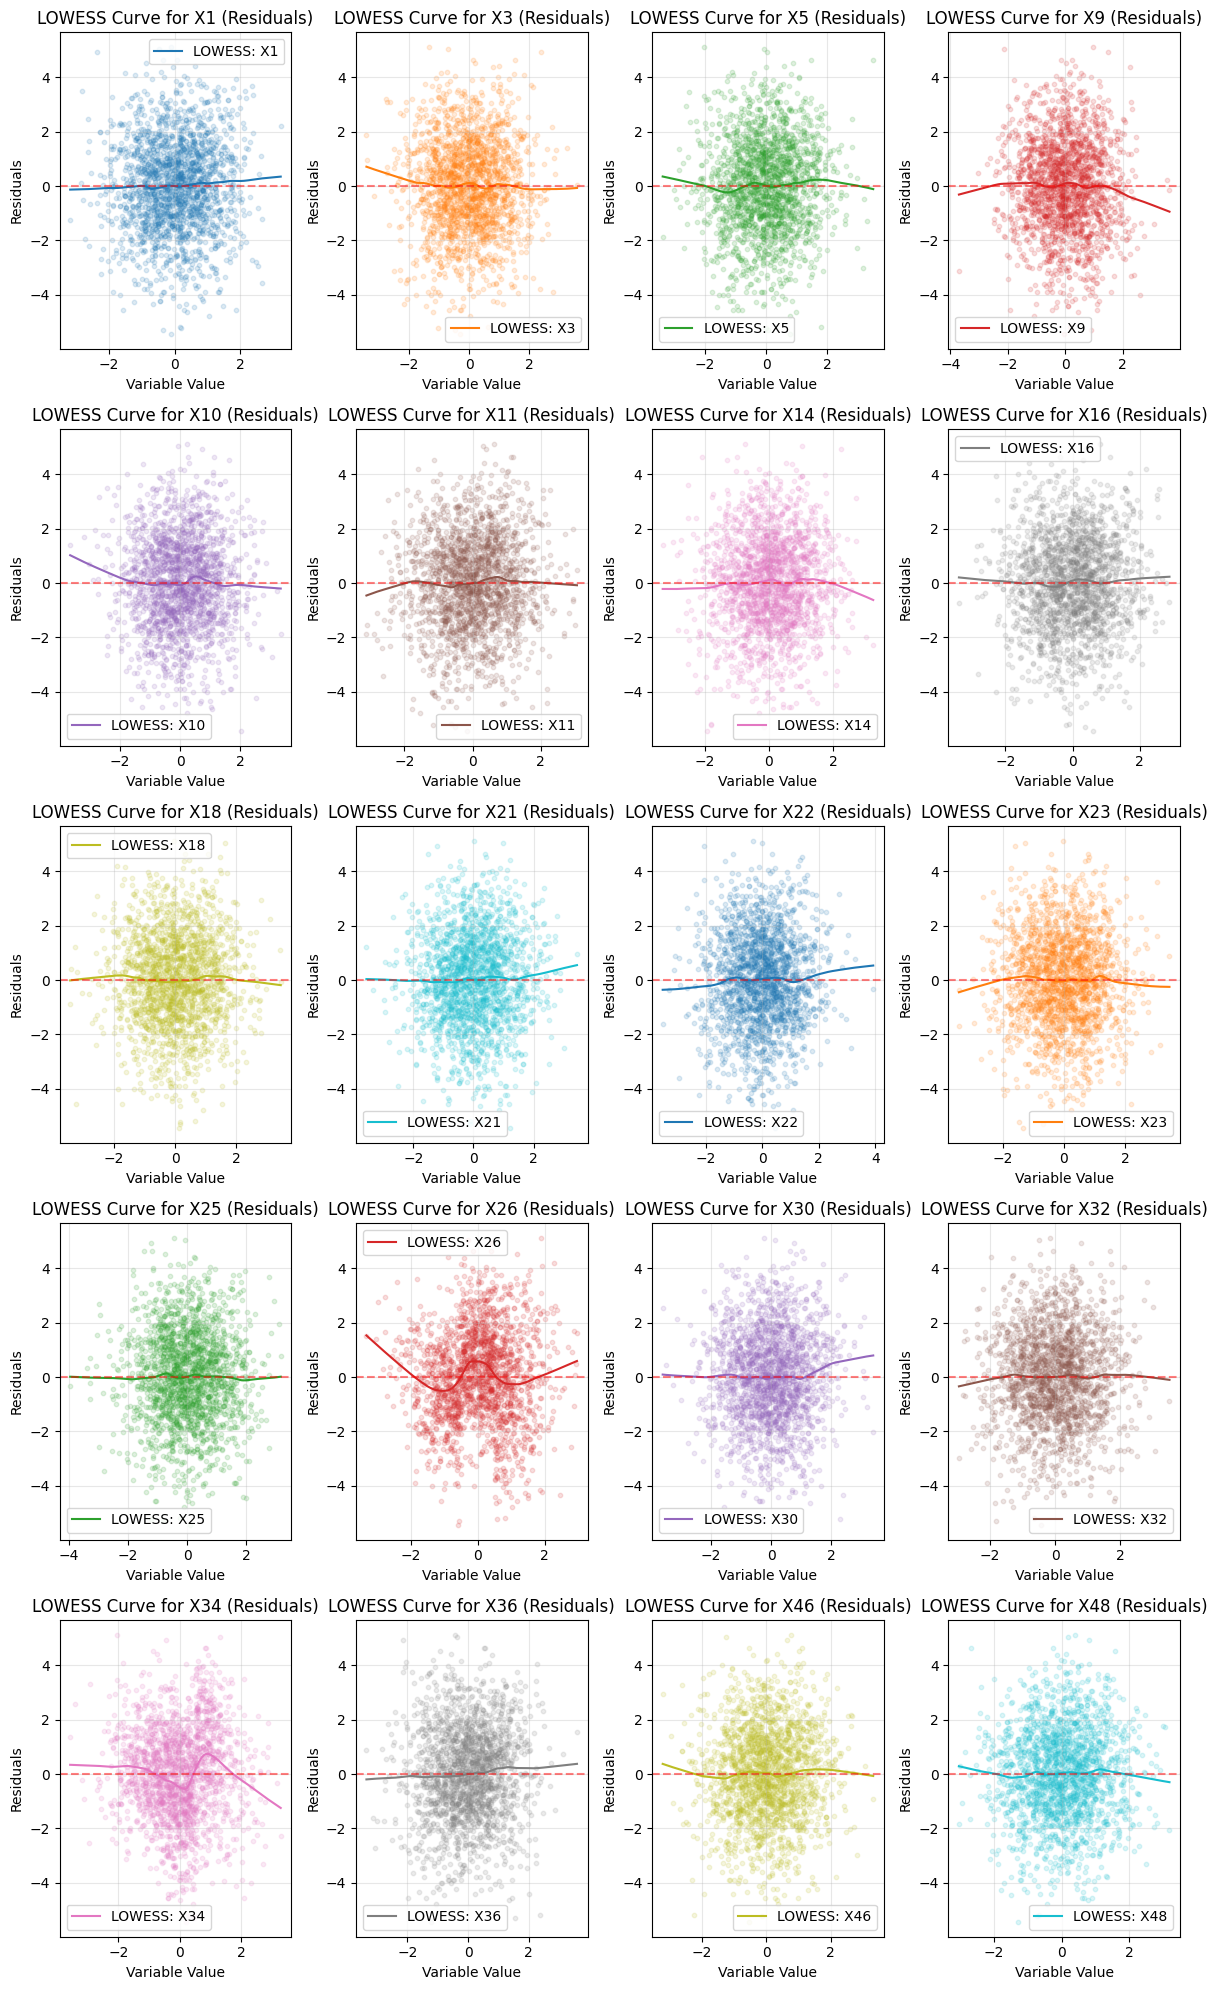

In [87]:
# Run LOWESS of these var on residuals of LASSO 3
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Only keep variables that are columns in X_train
original_vars = [var for var in multi_selected_vars if var in X_train.columns]

# Define color palette
colors = plt.cm.tab10.colors
# Plot residuals from LASSO polynomial model instead of original data
residuals_train = y_train - (yhat_train_1 + yhat_train_2 + yhat_train_3)

# Calculate number of rows needed
nrows = (len(original_vars) + 1) // 4  # 4 columns per row
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(12, 4 * nrows))
if nrows == 1:
    axes = axes.reshape(1, -1)

for i, var in enumerate(original_vars):
    x_data = X_train[var].values
    lowess_result = lowess(residuals_train, x_data, frac=0.3, return_sorted=True)

    row, col = divmod(i, 4)
    axes[row, col].plot(lowess_result[:, 0], lowess_result[:, 1], label=f'LOWESS: {var}', color=colors[i % len(colors)])
    axes[row, col].scatter(x_data, residuals_train, alpha=0.15, s=10, color=colors[i % len(colors)])
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'LOWESS Curve for {var} (Residuals)')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].axhline(y=0, color='red', linestyle='--', alpha=0.5)
# Set xlabel for all axes
for ax in axes.flat:
    ax.set_xlabel('Variable Value')
plt.tight_layout()

# save figure
plt.savefig('lowess_curves.png')

In [103]:
# Among these features, X34 and X26 are the most suspicious one that needs LOWESS
# X10, X30, X26, X32, X20, X21, X22 are also candidates but not as strong as X34

# Predict using LOWESS for each of them
# Select all original variables that appear in the polynomial features
lowess_vars = [f'X{i}' for i in range(1, 51)]

# Plus most suspicious ones' (X34, X26, X10, X30, X32, X20, X21, X22) square and cubic terms
lowess_vars += ['X34^2', 'X34^3', 'X26^2', 'X26^3', 'X10^2', 'X10^3', 'X30^2', 'X30^3', 'X32^2', 'X32^3', 'X20^2', 'X20^3', 'X21^2', 'X21^3', 'X22^2', 'X22^3']

lowess_fracs = [0.2, 0.3, 0.4]  # fracs to try

# Use the existing polynomial feature dataframes
X_train_lowess = pd.DataFrame(index=X_train.index)
X_val_lowess = pd.DataFrame(index=X_val.index)

def fit_lowess_and_interp(x_tr, y_tr, x_new, frac):
    # Fit once to get the ordered (x, yhat)
    # Choose return_sorted=False + argsort, or directly True; here use True for clarity
    res = lowess(endog=y_tr, exog=x_tr, frac=frac, return_sorted=True)
    x_sorted, y_sm = res[:,0], res[:,1]
    return np.interp(x_new, x_sorted, y_sm, left=y_sm[0], right=y_sm[-1]), (x_sorted, y_sm)

for var in lowess_vars:
    best = {"frac": None, "rmse": np.inf, "pred_tr": None, "pred_val": None}

    for frac in lowess_fracs:
        # Use the appropriate data source for each variable type
        if var in X_train.columns:
            # Original features
            x_train_data = X_train[var].values
            x_val_data = X_val[var].values
        else:
            # Polynomial features - use the existing polynomial dataframes
            x_train_data = Z_train_df[var].values
            x_val_data = Z_val_df[var].values
            
        # Fit once to get the predictions for train/val
        yhat_tr, (x_sorted, y_sm) = fit_lowess_and_interp(x_train_data, y_train.values,
                                                          x_train_data, frac)
        yhat_val = np.interp(x_val_data, x_sorted, y_sm, left=y_sm[0], right=y_sm[-1])
        rmse_val = np.sqrt(mean_squared_error(y_val, yhat_val))
        if rmse_val < best["rmse"]:
            best.update(frac=frac, rmse=rmse_val, pred_tr=yhat_tr, pred_val=yhat_val)
    
    X_train_lowess[f'LOWESS_{var}'] = best["pred_tr"]
    X_val_lowess[f'LOWESS_{var}']   = best["pred_val"]
    print(f"Selected LOWESS {var}  frac={best['frac']:.2f}  Val RMSE={best['rmse']:.4f}")

print("LOWESS features added:", [f'LOWESS_{v}' for v in lowess_vars])


Selected LOWESS X1  frac=0.30  Val RMSE=3.6461
Selected LOWESS X2  frac=0.40  Val RMSE=3.7133
Selected LOWESS X3  frac=0.40  Val RMSE=3.6963
Selected LOWESS X4  frac=0.20  Val RMSE=3.6996
Selected LOWESS X5  frac=0.40  Val RMSE=3.6738
Selected LOWESS X6  frac=0.40  Val RMSE=3.6940
Selected LOWESS X7  frac=0.40  Val RMSE=3.6977
Selected LOWESS X8  frac=0.20  Val RMSE=3.6828
Selected LOWESS X9  frac=0.30  Val RMSE=3.6936
Selected LOWESS X10  frac=0.40  Val RMSE=3.6667
Selected LOWESS X11  frac=0.40  Val RMSE=3.6578
Selected LOWESS X12  frac=0.40  Val RMSE=3.6791
Selected LOWESS X13  frac=0.20  Val RMSE=3.6899
Selected LOWESS X14  frac=0.30  Val RMSE=3.6728
Selected LOWESS X15  frac=0.40  Val RMSE=3.6384
Selected LOWESS X16  frac=0.40  Val RMSE=3.6494
Selected LOWESS X17  frac=0.40  Val RMSE=3.6954
Selected LOWESS X18  frac=0.40  Val RMSE=3.6973
Selected LOWESS X19  frac=0.20  Val RMSE=3.7056
Selected LOWESS X20  frac=0.40  Val RMSE=3.6827
Selected LOWESS X21  frac=0.30  Val RMSE=3.6753
S

In [104]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create validation predictions matrix
pred_poly_val = yhat_val_1 + yhat_val_2 + yhat_val_3
preds_lowess_val = [X_val_lowess[f'LOWESS_{var}'].values for var in lowess_vars]

# Stack polynomial and LOWESS predictions
P_val = np.column_stack([pred_poly_val] + preds_lowess_val)

from sklearn.linear_model import ElasticNetCV

meta = ElasticNetCV(alphas=[1e-6, 1e-4, 1e-3, 1e-2, 1e-1],
                    l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                    fit_intercept=False,
                    cv=5).fit(P_val, y_val)

w_elastic = meta.coef_
y_blend_val = meta.predict(P_val)
print("ElasticNet weights:", w_elastic)
print("ElasticNet val RMSE:", rmse(y_val, y_blend_val))

# Print non-zero features and their weights
feature_names = ['Poly_model'] + [f'LOWESS_{var}' for var in lowess_vars]
print("Non-zero features and their weights:")
for name, weight in zip(feature_names, w_elastic):
    if weight != 0:
        print(f"{name}: {weight}")

# Store weights for later use in test predictions
w_ridge = w_elastic


ElasticNet weights: [ 1.08271223  0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.13267242  0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.09567738 -0.
 -0.         -0.          0.13171908 -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.11306592 -0.         -0.         -0.         -0.06852264
 -0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.          0.12687418  0.16862714  0.13370433
  0.06285847 -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.        ]
ElasticNet val RMSE: 1.7003568878423028
Non-zero features and their weights:
Poly_model: 1.082712232041539
LOWESS_X10: -0.13267242198573914
LOWESS_X22: 0.09567738094265836
LOWESS_X26: 0.1317190839097583
LOWESS_X37: -0.1130659177804528


In [109]:
# Load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/cxxclk/ECOM90025/main/Data/test_data.csv')
test_ids = test_data['ID']
test_data_clean = test_data.drop(columns=['ID'])

# 1) Create polynomial features for test data
Z_test = poly.transform(test_data_clean)
Z_test_df = pd.DataFrame(Z_test, columns=names, index=test_data_clean.index)

# 2) Get predictions from all three LASSO models
yhat_test_1 = lasso_1.predict(Z_test_df[selected_features_1])
yhat_test_2 = lasso_2.predict(Z_test_df[selected_features_2])
yhat_test_3 = lasso_2_tuned.predict(Z_test_df[selected_features_3])
pred_poly_test = yhat_test_1 + yhat_test_2 + yhat_test_3

# 3) Generate LOWESS predictions for test data
# Combine full training data
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])
preds_lowess_test = []
# Only process variables that have non-zero weights in the ensemble
non_zero_indices = np.where(w_ridge != 0)[0]
feature_names = ['Poly_model'] + [f'LOWESS_{var}' for var in lowess_vars]

print(f"Processing {len(non_zero_indices)} non-zero weighted features out of {len(feature_names)}")

for idx in non_zero_indices:
    if idx == 0:  # Polynomial model
        continue  # Already computed as pred_poly_test
    
    var_idx = idx - 1  # Adjust for polynomial model being first
    var = lowess_vars[var_idx]
    
    # Find the best fraction used during validation for this variable
    best = {"frac": None, "rmse": np.inf, "pred_test": None}
    
    for frac in lowess_fracs:
        # Use the appropriate data source for each variable type
        if var in X_full.columns:
            # Original features
            x_train_data = X_full[var].values
            x_test_data = test_data_clean[var].values
            x_val_data = X_val[var].values
        else:
            # Polynomial features - create full polynomial dataframes
            Z_full = poly.transform(X_full)
            Z_full_df = pd.DataFrame(Z_full, columns=names, index=X_full.index)
            x_train_data = Z_full_df[var].values
            x_test_data = Z_test_df[var].values
            x_val_data = Z_val_df[var].values
        
        # Fit LOWESS on full training data
        yhat_tr_full, (x_sorted, y_sm) = fit_lowess_and_interp(
            x_train_data, y_full.values, x_train_data, frac
        )
        
        # Predict on test data
        yhat_test = np.interp(x_test_data, x_sorted, y_sm, 
                             left=y_sm[0], right=y_sm[-1])
        
        # Use the same validation approach to select best frac
        yhat_val_check = np.interp(x_val_data, x_sorted, y_sm, 
                                  left=y_sm[0], right=y_sm[-1])
        rmse_val_check = np.sqrt(mean_squared_error(y_val, yhat_val_check))
        
        if rmse_val_check < best["rmse"]:
            best.update(frac=frac, rmse=rmse_val_check, pred_test=yhat_test)
    
    preds_lowess_test.append(best["pred_test"])
    print(f"Selected LOWESS {var} for test: frac={best['frac']:.2f}, weight={w_ridge[idx]:.4f}")


# 4) Assemble P_test and use w_ridge for blending
# Only include predictions for features with non-zero weights
P_test_filtered = [pred_poly_test] if 0 in non_zero_indices else []

# Add LOWESS predictions only for non-zero weighted features
lowess_preds_filtered = []
for idx in non_zero_indices:
    if idx == 0:  # Polynomial model already handled
        continue
    var_idx = idx - 1
    lowess_preds_filtered.append(preds_lowess_test[len(lowess_preds_filtered)])

P_test_filtered.extend(lowess_preds_filtered)
P_test = np.column_stack(P_test_filtered)

# Use only the non-zero weights
w_ridge_filtered = w_ridge[non_zero_indices]
y_test_blend = P_test @ w_ridge_filtered

# 5) Create submission
submission = pd.DataFrame({'ID': test_ids, 'Y': y_test_blend})
submission.to_csv('submission.csv', index=False)
print(f"Submission saved with {len(submission)} predictions")
print(f"Test predictions range: [{y_test_blend.min():.4f}, {y_test_blend.max():.4f}]")

Processing 10 non-zero weighted features out of 67
Selected LOWESS X10 for test: frac=0.40, weight=-0.1327
Selected LOWESS X22 for test: frac=0.20, weight=0.0957
Selected LOWESS X26 for test: frac=0.20, weight=0.1317
Selected LOWESS X37 for test: frac=0.40, weight=-0.1131
Selected LOWESS X41 for test: frac=0.30, weight=-0.0685
Selected LOWESS X34^2 for test: frac=0.20, weight=0.1269
Selected LOWESS X34^3 for test: frac=0.20, weight=0.1686
Selected LOWESS X26^2 for test: frac=0.20, weight=0.1337
Selected LOWESS X26^3 for test: frac=0.20, weight=0.0629
Submission saved with 1600 predictions
Test predictions range: [-14.5031, 12.1216]
